In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

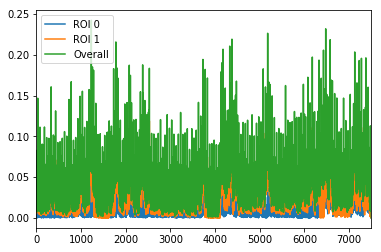

In [2]:
d = pd.read_csv("cut66_out.csv")
d.plot()

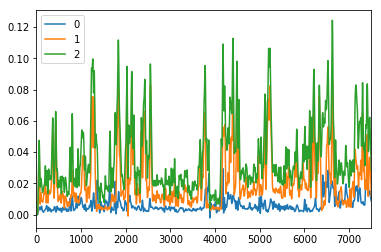

In [3]:
import scipy.signal

cuttoff_freq = 0.75
ds = 25
data = d
norm_pass = cuttoff_freq/(ds/2)
norm_stop = 1.5*norm_pass
(N, Wn) = scipy.signal.buttord(wp=norm_pass, ws=norm_stop, gpass=2,
                               gstop=30, analog=0)
(b, a) = scipy.signal.butter(N, Wn, btype='low', analog=0, output='ba')
data1 = [scipy.signal.lfilter(b, a, data[c].values) for c in data]
data1 = pd.DataFrame(data1).T
data1.plot()

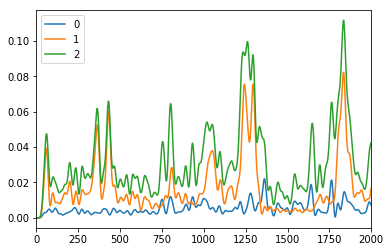

In [5]:
data1[0:2000].plot()